In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import seaborn as sns
import sklearn.metrics as metrics

In [2]:
mnist = tf.keras.datasets.mnist
 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train[x_train>0] = 1;
x_test[x_test>0]  = 1;

In [3]:
""" resizing images into r x r """

r = 10

sz = x_train.shape[0]
s  = x_test.shape[0]

X_train = np.zeros((sz, r, r))
X_test  = np.zeros((s , r, r))

for i in range(sz):
  X_train[i,:,:] = cv.resize(x_train[i,:,:], (r,r))
 
for i in range(s):
  X_test[i,:,:] = cv.resize(x_test[i,:,:], (r,r))

X_train = np.reshape(X_train, (60000, r, r, 1))
X_test  = np.reshape(X_test,  (10000, r, r, 1))

print(X_train.shape, X_test.shape)

(60000, 10, 10, 1) (10000, 10, 10, 1)


In [4]:
""" Creating the layers in model """

model = tf.keras.models.Sequential([
    
  tf.keras.layers.Flatten(input_shape=(10, 10)),
  tf.keras.layers.Dense(10, use_bias=False)
    
])

In [5]:
""" Specifying the Loss function """

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [6]:
""" Specifying the Optimization Algorithm and 
     metrics to use for evaluation while training """

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [7]:
""" Traning the model """

model.fit(X_train, y_train, epochs=20, batch_size=8, use_multiprocessing=True)

Epoch 1/20
7500/7500 [==============================] - 6s 679us/step - loss: 1.0572 - accuracy: 0.7067
Epoch 2/20
7500/7500 [==============================] - 7s 906us/step - loss: 0.4986 - accuracy: 0.8524
Epoch 3/20
7500/7500 [==============================] - 6s 805us/step - loss: 0.4708 - accuracy: 0.8585
Epoch 4/20
7500/7500 [==============================] - 6s 762us/step - loss: 0.4649 - accuracy: 0.8586
Epoch 5/20
7500/7500 [==============================] - 6s 753us/step - loss: 0.4629 - accuracy: 0.8607
Epoch 6/20
7500/7500 [==============================] - 6s 786us/step - loss: 0.4480 - accuracy: 0.8632
Epoch 7/20
7500/7500 [==============================] - 6s 797us/step - loss: 0.4592 - accuracy: 0.8614
Epoch 8/20
7500/7500 [==============================] - 6s 770us/step - loss: 0.4531 - accuracy: 0.8630
Epoch 9/20
7500/7500 [==============================] - 6s 787us/step - loss: 0.4504 - accuracy: 0.8646
Epoch 10/20
7500/7500 [==============================] - 6s 811u

In [8]:
""" Evaluating the model """

model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 0s 664us/step - loss: 0.4410 - accuracy: 0.8704


[0.44100555777549744, 0.8704000115394592]

In [9]:
""" Adding the Softmax layer at the end of model """

probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [10]:
y_prob = probability_model(X_test).numpy()


In [11]:
y_prob = probability_model(X_test).numpy()

y_pred = np.argmax( y_prob, axis=1)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       980
           1       0.92      0.96      0.94      1135
           2       0.87      0.84      0.86      1032
           3       0.85      0.85      0.85      1010
           4       0.88      0.86      0.87       982
           5       0.86      0.77      0.81       892
           6       0.91      0.91      0.91       958
           7       0.91      0.85      0.88      1028
           8       0.79      0.83      0.81       974
           9       0.81      0.85      0.83      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



Comfusion Matrix
 [[ 949    0    2    7    1    2    8    2    9    0]
 [   0 1084    9    4    1    6    5    0   20    6]
 [  17   12  867   24   15    5   23   12   50    7]
 [  11    9   34  858    3   37    4    9   33   12]
 [   6   11    7    1  843    1   14   10   15   74]
 [  17    3   14   53   10  685   25    6   65   14]
 [  14    6   17    2   13   23  876    0    7    0]
 [   4   22   26    9   15    1    0  874    8   69]
 [  14   18   16   33    8   30   10    8  812   25]
 [  11   18    4   14   47   10    1   37   11  856]]


<AxesSubplot:>

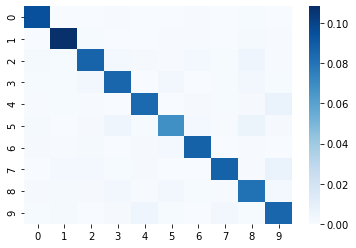

In [12]:
labels = [0,1,2,3,4,5,6,7,8,9]

cf_matrix = metrics.confusion_matrix( y_test, y_pred)

print("Comfusion Matrix\n", cf_matrix)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=False, cmap='Blues', 
            xticklabels = labels , yticklabels = labels)

In [13]:
""" saving the model """

model.save('mnist_Arduino.h5')

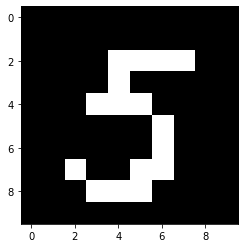

In [14]:
idx = 253

img = X_test[idx:idx+1,:]
im = np.reshape(img, (r,r))

plt.imshow(im, cmap='gray')

In [15]:
np.int32(im)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [16]:
print("Predicted by model :", np.argmax( probability_model(img).numpy(), axis=1)[0] )

Predicted by model : 5


In [17]:
L1 = model.weights[0].numpy()
L1 = 10*L1
L1 = L1.astype(int)

print(L1.shape)

(100, 10)


In [18]:
""" For Arduino code """

print("char W[%d][%d]="%(L1.shape[1], L1.shape[0]))
print("{")
for c in range(0,L1.shape[1]):
    print("{",end="")
    
    for r in range(0,L1.shape[0]-1):
        print(L1[r,c],end=",")
    print(L1[r+1,c],"},")

print("};")

char W[10][100]=
{
{0,-1,-5,-26,1,-5,-31,-8,-4,1,-1,0,-8,-3,-2,0,-1,-4,-9,-31,-11,-21,-10,-6,-3,3,11,-2,-4,-37,-28,-8,-5,-4,3,0,4,6,0,-39,0,-11,3,0,-2,-30,-7,4,13,-24,-10,-1,2,9,-14,-38,-6,2,5,-45,-13,-20,5,6,-10,-12,4,1,2,-32,-14,-1,0,9,5,3,-2,-3,-4,-2,-1,-42,-3,0,12,1,-2,-8,-11,-7,0,-26,-23,-69,-76,-41,-35,-18,-13,0 },
{1,0,-1,-7,-19,1,-13,-6,-1,1,1,-10,-16,-4,3,3,0,3,-9,-20,-6,-2,-14,-19,-10,-13,-13,-3,-9,-27,-4,-22,-9,-10,-6,11,-8,-12,-40,-9,-8,-2,-9,-20,-3,30,-14,-13,-8,-11,-1,-3,-18,-26,6,21,-29,-27,-31,-2,9,-22,-24,-4,12,0,-21,2,-7,-10,5,-6,1,-1,-2,-4,1,4,-5,-2,-2,-18,6,2,-7,7,9,-9,-19,13,-1,-23,-24,-52,-69,-38,-40,-17,-9,-1 },
{0,-5,-16,-1,-4,5,-6,-17,-9,1,-4,0,0,3,7,6,0,-5,-22,-33,-11,0,1,1,3,1,-1,-4,-12,-15,-12,-2,1,-1,-7,-2,0,-1,-23,-9,-13,-19,-28,-23,-23,-13,-6,-3,-9,17,-13,0,-3,-3,5,0,-5,-4,-1,30,-16,0,5,4,10,4,1,3,11,12,-5,4,6,8,2,1,7,9,12,5,-1,-7,0,1,-5,-4,1,4,3,-8,0,-31,-35,-38,-58,-34,-62,-33,-26,0 },
{-2,0,-14,-18,-27,-32,-23,-12,-3,-1,6,5,6,3,2,1,-3,-12,-40,-32,7,8,5